# CSCA 5642 Introduction to Deep Learning : Gesture Recognition Final Project

## Problem Statement

Imagine you are working as a Machine Learning (ML) Engineer at a home electronics company that manufactures state-of-the-art smart televisions. The goal is to develop a feature for smart TVs to recognize five different gestures performed by the user, allowing control of the TV without using a remote. 

Each gesture corresponds to a specific command:
- **Thumbs up:** Increase the volume
- **Thumbs down:** Decrease the volume
- **Left swipe:** Jump backwards 10 seconds
- **Right swipe:** Jump forward 10 seconds
- **Stop:** Pause the movie

The gestures are continuously monitored by the webcam mounted on the TV, with each video consisting of a sequence of 30 frames (or images).


## Dataset Description

The dataset contains a total of **773 videos**, categorized into one of five classes:
- **Training Set:** 663 videos
- **Validation Set:** 100 videos

### Folder Structure
The data is provided in a compressed ZIP file containing:
1. Two main folders: `train` and `val`.
2. Each folder (`train` and `val`) is divided into subfolders where:
   - Each subfolder represents a single video.
   - The subfolder contains **30 frames (images)** corresponding to that video.

### Frame Dimensions
- All images within a video subfolder share the same dimensions.
- Different videos may have different dimensions: either **360x360** or **120x160** depending on the recording webcam.

### CSV Files
- Each main folder (`train` and `val`) includes a corresponding CSV file (`train.csv` and `val.csv`).
- Each row in these CSV files provides the following information:
  1. The **name of the subfolder** containing the video frames.
  2. The **gesture name** (e.g., thumbs up, thumbs down).
  3. The **numeric label** of the video (0-4) corresponding to the gesture class.
 

This dataset is available at: https://www.kaggle.com/datasets/abhishek14398/gesture-recognition-dataset

## Exploratory Data Analysis

### Inspect Dataset

To understand the dataset better, we inspect the folder structure and the CSV files to verify the following:
1. Each subfolder contains 30 frames (images).
2. All frames are labeled correctly in the CSV files.

In [2]:
import os
import pandas as pd

# Path to data
data_path = "/kaggle/input/gesture-recognition-dataset"
train_path = os.path.join(data_path, "train")
val_path = os.path.join(data_path, "val")

# Specify column names explicitly
columns = ['folder', 'gesture_name', 'label']

# Load CSV files with the correct delimiter
train_csv = pd.read_csv(os.path.join(data_path, "train.csv"), delimiter=';', header=None, names=columns)
val_csv = pd.read_csv(os.path.join(data_path, "val.csv"), delimiter=';', header=None, names=columns)

# Verify the loaded data
print("Training Data:")
print(train_csv.head())

print("\nValidation Data:")
print(val_csv.head())

Training Data:
                                     folder    gesture_name  label
0  WIN_20180925_17_08_43_Pro_Left_Swipe_new  Left_Swipe_new      0
1  WIN_20180925_17_18_28_Pro_Left_Swipe_new  Left_Swipe_new      0
2  WIN_20180925_17_18_56_Pro_Left_Swipe_new  Left_Swipe_new      0
3  WIN_20180925_17_19_51_Pro_Left_Swipe_new  Left_Swipe_new      0
4  WIN_20180925_17_20_14_Pro_Left_Swipe_new  Left_Swipe_new      0

Validation Data:
                                     folder    gesture_name  label
0  WIN_20180925_17_17_04_Pro_Left_Swipe_new  Left_Swipe_new      0
1  WIN_20180925_17_43_01_Pro_Left_Swipe_new  Left_Swipe_new      0
2  WIN_20180925_18_01_40_Pro_Left_Swipe_new  Left_Swipe_new      0
3  WIN_20180925_18_03_21_Pro_Left_Swipe_new  Left_Swipe_new      0
4  WIN_20180926_16_46_22_Pro_Left_Swipe_new  Left_Swipe_new      0


### Data Distribution

Visualizing the number of videos per gesture class in the training and validation datasets.


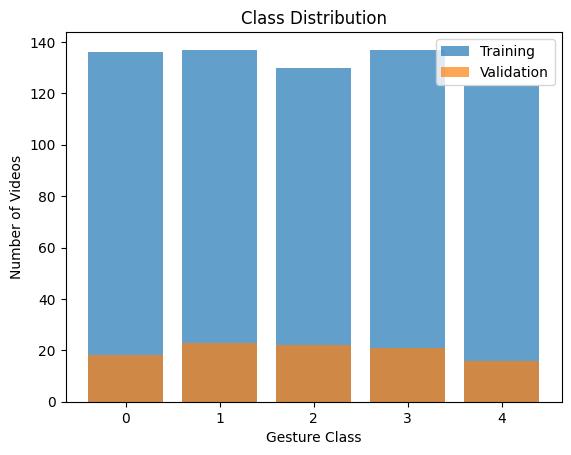

In [3]:
# Class distribution
train_class_dist = train_csv['label'].value_counts()
val_class_dist = val_csv['label'].value_counts()

# Plot distribution
import matplotlib.pyplot as plt

plt.bar(train_class_dist.index, train_class_dist.values, alpha=0.7, label="Training")
plt.bar(val_class_dist.index, val_class_dist.values, alpha=0.7, label="Validation")
plt.xlabel('Gesture Class')
plt.ylabel('Number of Videos')
plt.title('Class Distribution')
plt.legend()
plt.show()

### Example Frames

Displaying example frames for each gesture class to visualize the dat.


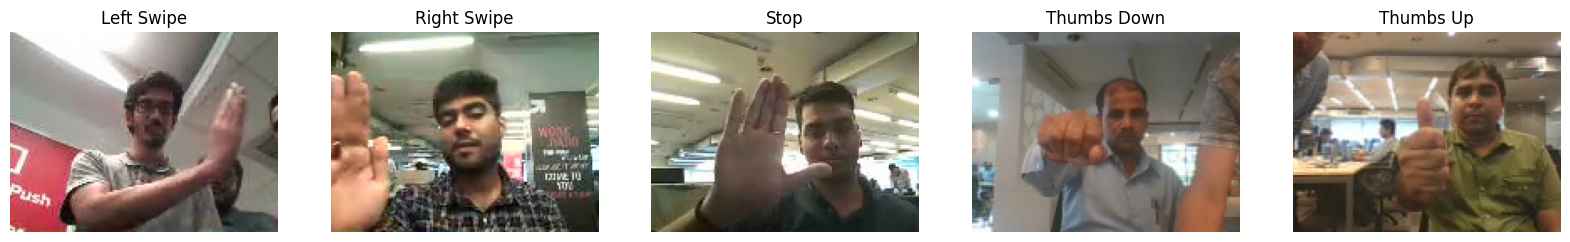

In [4]:
# Visualize example frames
import cv2
import matplotlib.pyplot as plt

# Map labels to gesture names
gesture_labels = {
    0: "Left Swipe",
    1: "Right Swipe",
    2: "Stop",
    3: "Thumbs Down",
    4: "Thumbs Up"
}

# Display example frames
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

for i, (label, gesture) in enumerate(gesture_labels.items()):
    # Get the folder for a video of this gesture
    video_folder = train_csv[train_csv['label'] == label].iloc[0]['folder']
    video_path = os.path.join(train_path, video_folder)
    frame_path = os.path.join(video_path, os.listdir(video_path)[0])  # Load the first frame
    frame = cv2.imread(frame_path)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    axes[i].imshow(frame)
    axes[i].set_title(gesture)
    axes[i].axis('off')

plt.show()

### Image Dimensions

Analyzing the distribution of image dimensions (360x360 vs 120x160) across the datase.


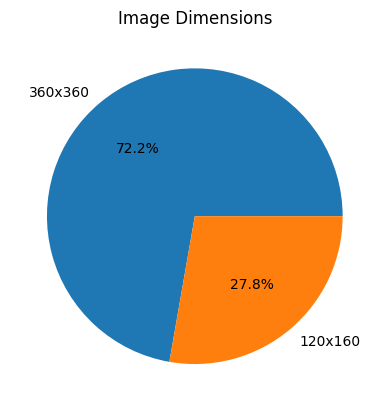

In [4]:
# Analyze image dimensions
dimensions = []

for folder in train_csv['folder']:
    video_path = os.path.join(train_path, folder)
    frame_path = os.path.join(video_path, os.listdir(video_path)[0])  # Load first frame
    frame = cv2.imread(frame_path)
    dimensions.append(frame.shape[:2])  # Height and width

# Count dimensions
import pandas as pd

dimension_counts = pd.Series(dimensions).value_counts()

# Pie chart
dimension_counts.plot(kind='pie', autopct='%1.1f%%', labels=['360x360', '120x160'], title='Image Dimensions')
plt.ylabel("")
plt.show()

### Data Cleaning

Identifying missing labels, videos with fewer or extra frames, and other inconsistencies in the daat.


In [5]:
# Check for missing labels
missing_labels = train_csv[train_csv['label'].isnull()]
print(f"Missing labels: {len(missing_labels)}")

# Check for videos with incorrect frame count
incorrect_frames = []
for folder in train_csv['folder']:
    video_path = os.path.join(train_path, folder)
    frame_count = len(os.listdir(video_path))
    if frame_count != 30:
        incorrect_frames.append((folder, frame_count))

print(f"Videos with incorrect frame count: {len(incorrect_frames)}")

Missing labels: 0
Videos with incorrect frame count: 0


# Model Training

Next we focus on:
1. Preparing the data for training by standardizing and normalizing the frames.
2. Implementing and training two deep learning models: **Conv3D** and **CNN + LSTM**.
3. Comparing the models based on their performance metrics, such as training and validation accuracy.

## Preprocessing and Data Preparation

Before training the models, we need to preprocess the data:
1. **Standardizing Dimensions**: Since videos in the dataset have varying dimensions (360x360 or 120x160), all frames are resized to a fixed size of 80x80 pixels.
2. **Normalizing Pixel Values**: Pixel values are normalized to the range [0, 1] to ensure consistent input scaling, which helps models converge faster during training.
3. **Frame Selection**: Each video is represented by 30 frames, loaded in sequential order from the subfolder.
4. **Splitting Data**: The dataset is divided into training and validation sets to evaluate model performance on unseen data.

In [6]:
import torch
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

# Define image dimensions for resizing
IMAGE_HEIGHT = 80  # Standard height
IMAGE_WIDTH = 80   # Standard width
NUM_FRAMES = 30    # Number of frames per video

# Define preprocessing transformation
transform = transforms.Compose([
    transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),  # Resizes all frames to 80x80
    transforms.ToTensor()  # Converts image to [0, 1] range and channels-first format
])

# Helper function to preprocess video frames on GPU
def preprocess_video_gpu(video_path):
    frames = []
    for frame_file in sorted(os.listdir(video_path))[:NUM_FRAMES]:
        frame_path = os.path.join(video_path, frame_file)
        frame = Image.open(frame_path).convert("RGB")
        frames.append(transform(frame))  # Apply transformation
    return torch.stack(frames).cuda()  # Move to GPU

# Preprocess training set
X_train, y_train = [], []
for i, row in tqdm(train_csv.iterrows(), total=len(train_csv)):
    video_path = os.path.join(train_path, row['folder'])
    X_train.append(preprocess_video_gpu(video_path))
    y_train.append(row['label'])

# Preprocess validation set
X_val, y_val = [], []
for i, row in tqdm(val_csv.iterrows(), total=len(val_csv)):
    video_path = os.path.join(val_path, row['folder'])
    X_val.append(preprocess_video_gpu(video_path))
    y_val.append(row['label'])

# Convert to tensors
X_train = torch.stack(X_train)  # [num_samples, channels, depth, height, width]
y_train = torch.tensor(y_train).cuda()

X_val = torch.stack(X_val)  # [num_samples, channels, depth, height, width]
y_val = torch.tensor(y_val).cuda()

print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")

100%|██████████| 100/100 [00:21<00:00,  4.62it/s]

Training data shape: torch.Size([663, 30, 3, 80, 80]), Validation data shape: torch.Size([100, 30, 3, 80, 80])


## Model 1: 3D Convolutional Network (Conv3D)

A 3D Convolutional Network processes both spatial and temporal features directly from video data. 

### Key Features:
- Extracts spatiotemporal patterns across frames.
- Uses 3D convolutional layers and 3D pooling to capture video dynamics.

### Advantages:
- Suitable for processing video data with temporal dependencies.
- Straightforward architecture for video classification tasks.

### Disadvantages:
- Computationally intensive, especially with high-resolution input or large datasets.

### Model Summary:
- Two 3D convolutional layers with max-pooling layers.
- A fully connected dense layer before the output layer.

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define Conv3D model
class Conv3DModel(nn.Module):
    def __init__(self):
        super(Conv3DModel, self).__init__()
        self.conv1 = nn.Conv3d(3, 32, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool1 = nn.MaxPool3d(kernel_size=(2, 2, 2))
        self.conv2 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), stride=1, padding=1)
        self.pool2 = nn.MaxPool3d(kernel_size=(2, 2, 2))
        self.fc1 = nn.Linear(64 * 7 * 20 * 20, 128) 
        self.fc2 = nn.Linear(128, 5)  # 5 gesture classes

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
conv3d_model = Conv3DModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv3d_model.parameters(), lr=0.001)

We’ll use a DataLoader to handle batching efficiently and ensure data is moved to the GPU during training.

In [8]:
from torch.utils.data import TensorDataset, DataLoader

# Rearrange dimensions for Conv3D
# Input: [num_samples, depth, channels, height, width]
# Output: [num_samples, channels, depth, height, width]
X_train = X_train.permute(0, 2, 1, 3, 4)  # Swap depth and channels
X_val = X_val.permute(0, 2, 1, 3, 4)


# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Training tensor shape: {X_train.shape}")
print(f"Validation tensor shape: {X_val.shape}") 

Training tensor shape: torch.Size([663, 3, 30, 80, 80])
Validation tensor shape: torch.Size([100, 3, 30, 80, 80])


Define the Training Loop

In [9]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_accuracy": [],
        "val_accuracy": []
    }

    for epoch in range(num_epochs):
        model.train()
        train_loss, train_correct = 0, 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Metrics
            train_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            train_correct += (preds == y_batch).sum().item()

        # Validation
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == y_batch).sum().item()

        # Calculate average loss and accuracy for this epoch
        train_loss /= len(train_loader)
        train_accuracy = train_correct / len(train_loader.dataset)
        val_loss /= len(val_loader)
        val_accuracy = val_correct / len(val_loader.dataset)

        # Store metrics in history
        history["train_loss"].append(train_loss)
        history["train_accuracy"].append(train_accuracy)
        history["val_loss"].append(val_loss)
        history["val_accuracy"].append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    return history

### Training Conv3D model

In [10]:
print("Training Conv3D Model...")
conv3d_history = train_model(conv3d_model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Training Conv3D Model...
Epoch 1/20, Train Loss: 1.9506, Train Acc: 0.2383, Val Loss: 1.6235, Val Acc: 0.2200
Epoch 2/20, Train Loss: 1.5817, Train Acc: 0.2504, Val Loss: 1.5794, Val Acc: 0.3900
Epoch 3/20, Train Loss: 1.2930, Train Acc: 0.4615, Val Loss: 1.4403, Val Acc: 0.5300
Epoch 4/20, Train Loss: 1.0402, Train Acc: 0.6078, Val Loss: 1.2587, Val Acc: 0.6000
Epoch 5/20, Train Loss: 0.7834, Train Acc: 0.7074, Val Loss: 1.1765, Val Acc: 0.6100
Epoch 6/20, Train Loss: 0.6166, Train Acc: 0.7873, Val Loss: 1.0859, Val Acc: 0.6900
Epoch 7/20, Train Loss: 0.4735, Train Acc: 0.8371, Val Loss: 1.1376, Val Acc: 0.6700
Epoch 8/20, Train Loss: 0.2424, Train Acc: 0.9186, Val Loss: 1.1905, Val Acc: 0.6800
Epoch 9/20, Train Loss: 0.1744, Train Acc: 0.9487, Val Loss: 1.1365, Val Acc: 0.7300
Epoch 10/20, Train Loss: 0.0710, Train Acc: 0.9849, Val Loss: 1.3387, Val Acc: 0.7100
Epoch 11/20, Train Loss: 0.0403, Train Acc: 0.9970, Val Loss: 1.6260, Val Acc: 0.7400
Epoch 12/20, Train Loss: 0.0226, Train

In [11]:
#Function to evaluate the model
def evaluate_model(model, val_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
    accuracy = correct / total
    print(f"Validation Accuracy: {accuracy:.4f}")
    return accuracy

In [12]:
evaluate_model(conv3d_model, val_loader)

Validation Accuracy: 0.7700


0.77

## Model 2: CNN + LSTM Hybrid Model

This model combines the strengths of CNNs and LSTMs:
1. **CNNs** extract spatial features from each frame.
2. **LSTMs** capture temporal dependencies across the sequence of frames.

### Key Features:
- Processes spatial features of individual frames using 2D CNNs.
- Leverages LSTMs to understand the temporal relationships between frames.

### Advantages:
- Handles spatial and temporal information effectively.
- More efficient than Conv3D for long sequences.

### Disadvantages:
- Requires sequential data preprocessing with `TimeDistributed` layers.

### Model Summary:
- A `TimeDistributed` CNN layer processes frames.
- An LSTM layer models temporal dependencies.
- Dense layers map temporal features to output classes.

In [13]:
class CNNLSTMModel(nn.Module):
    def __init__(self):
        super(CNNLSTMModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten()
        )
        self.lstm = nn.LSTM(32 * 40 * 40, 64, batch_first=True) 
        self.fc = nn.Linear(64, 5)  # 5 gesture classes

    def forward(self, x):
        # Input shape: [batch_size, channels, depth, height, width]
        batch_size, channels, depth, height, width = x.size()
        x = x.permute(0, 2, 1, 3, 4).contiguous()  # Rearrange to [batch_size, depth, channels, height, width]
        x = x.view(batch_size * depth, channels, height, width)  # Flatten temporal dimension
        x = self.cnn(x)  # Apply CNN
        x = x.view(batch_size, depth, -1).contiguous()  # Restore temporal dimension
        x, _ = self.lstm(x)  # LSTM
        x = self.fc(x[:, -1, :])  # Use the last LSTM output
        return x

In [14]:
cnn_lstm_model = CNNLSTMModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer_lstm = optim.Adam(cnn_lstm_model.parameters(), lr=0.001)

In [15]:
print("Training CNN + LSTM Model...")
cnn_lstm_history = train_model(cnn_lstm_model, train_loader, val_loader, criterion, optimizer_lstm, num_epochs=20)

Training CNN + LSTM Model...
Epoch 1/20, Train Loss: 1.6157, Train Acc: 0.1961, Val Loss: 1.6041, Val Acc: 0.2500
Epoch 2/20, Train Loss: 1.5832, Train Acc: 0.3002, Val Loss: 1.5780, Val Acc: 0.3800
Epoch 3/20, Train Loss: 1.5637, Train Acc: 0.3650, Val Loss: 1.6042, Val Acc: 0.3500
Epoch 4/20, Train Loss: 1.5488, Train Acc: 0.3801, Val Loss: 1.5554, Val Acc: 0.4600
Epoch 5/20, Train Loss: 1.5135, Train Acc: 0.4525, Val Loss: 1.5372, Val Acc: 0.4500
Epoch 6/20, Train Loss: 1.4764, Train Acc: 0.4525, Val Loss: 1.5126, Val Acc: 0.4400
Epoch 7/20, Train Loss: 1.4553, Train Acc: 0.4510, Val Loss: 1.5023, Val Acc: 0.5200
Epoch 8/20, Train Loss: 1.4186, Train Acc: 0.5551, Val Loss: 1.4758, Val Acc: 0.4000
Epoch 9/20, Train Loss: 1.3906, Train Acc: 0.5520, Val Loss: 1.4655, Val Acc: 0.5300
Epoch 10/20, Train Loss: 1.3336, Train Acc: 0.6516, Val Loss: 1.4090, Val Acc: 0.5500
Epoch 11/20, Train Loss: 1.2778, Train Acc: 0.7195, Val Loss: 1.3877, Val Acc: 0.6100
Epoch 12/20, Train Loss: 1.2281, T

In [16]:
evaluate_model(cnn_lstm_model, val_loader)

Validation Accuracy: 0.7300


0.73

### Compare Both Models
Now that both models are trained,lets compare their performance using the training and validation metrics stored in their respective history dictionaries.

In [17]:
def plot_comparison(metric, title):
    plt.plot(conv3d_history["train_" + metric], label="Conv3D Train")
    plt.plot(conv3d_history["val_" + metric], label="Conv3D Validation")
    plt.plot(cnn_lstm_history["train_" + metric], label="CNN + LSTM Train")
    plt.plot(cnn_lstm_history["val_" + metric], label="CNN + LSTM Validation")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.title(title)
    plt.legend()
    plt.show()

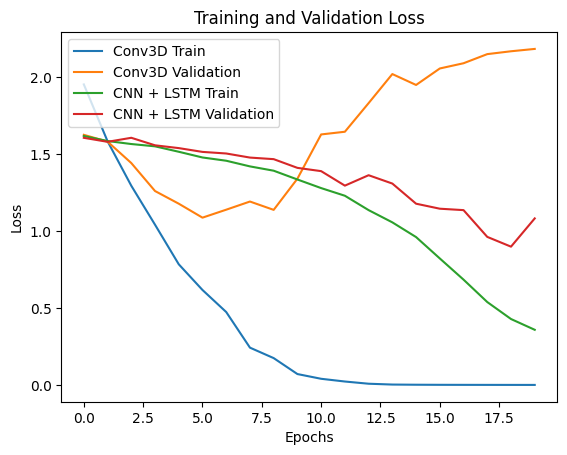

In [18]:
plot_comparison("loss", "Training and Validation Loss")

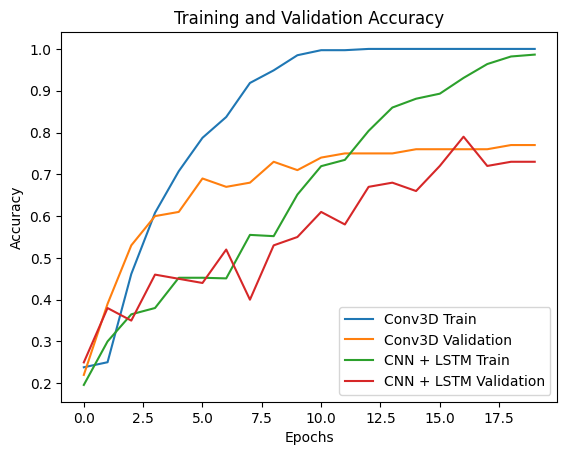

In [19]:
plot_comparison("accuracy", "Training and Validation Accuracy")

## **Conclusion**
The gesture recognition task was successfully approached using two distinct deep learning architectures: Conv3D and CNN + LSTM. Below are the key observations from the experiments:

1. **Conv3D Model**:
   - The Conv3D model demonstrated faster convergence during training and achieved a higher final accuracy on both training and validation datasets.
   - This indicates that Conv3D is well-suited for spatiotemporal data, directly processing both spatial and temporal features simultaneously.

2. **CNN + LSTM Model**:
   - The CNN + LSTM model showed slower convergence initially but improved steadily over epochs.
   - The model struggled more with overfitting compared to the Conv3D model, as observed in the validation loss and accuracy trends.
   - This architecture might require further tuning to handle temporal dependencies better.

3. **General Trends**:
   - The training accuracy for both models exceeded the validation accuracy, highlighting potential overfitting, especially in the CNN + LSTM model.
   - Conv3D's ability to learn from spatiotemporal data in an end-to-end manner likely gave it an edge in this task.

Overall, while Conv3D performed better, CNN + LSTM remains a promising alternative that could benefit from further optimization and hyperparameter tuning.


## **Future Improvements**
Given the constraints of time and computational resources, the following improvements could enhance the models' performance and robustness:

1. **Hyperparameter Tuning**:
   - Experiment with different learning rates, batch sizes, and optimization algorithms to find the best combination for each model.

2. **Data Augmentation**:
   - Apply techniques such as rotation, translation, flipping, and scaling to increase the diversity of the training dataset and prevent overfitting.

3. **Transfer Learning**:
   - Utilize pre-trained models (e.g., ResNet, VGG) as feature extractors, fine-tuning the final layers for gesture recognition to improve accuracy and reduce training time.

4. **Ensemble Learning**:
   - Train multiple models with varying architectures or hyperparameters and combine their predictions to achieve better accuracy.

5. **Improved Dataset**:
   - Collect more data from diverse users, lighting conditions, and environments to enhance the dataset's representativeness and improve generalization.

6. **Incorporate Temporal Context**:
   - Experiment with increasing the number of frames in video sequences or applying more advanced temporal modeling techniques, such as Transformer-based models, for richer temporal context.

7. **Try Other Architectures**:
   - Explore newer architectures such as CNN + Transformers or 3D CNN + RNN hybrids to leverage advancements in model designs.

8. **Regularization Techniques**:
   - Apply techniques like dropout, L2 regularization, or early stopping to reduce overfitting, especially in the CNN + LSTM model.

9. **Optimize Preprocessing**:
   - Investigate ways to optimize preprocessing steps (e.g., frame resizing or normalization) for both speed and accuracy improvements.
tion) for both speed and accuracy improvements.
